<a href="https://colab.research.google.com/github/TKhahahah/Text_Analytics/blob/main/Final_table(TK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second table

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyarrow
import pyarrow.parquet as pq

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
taxi_data = pq.read_table('/content/drive/MyDrive/DTW2/cl1.parquet')
taxi_data = taxi_data.to_pandas()
taxi_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,P_place,D_place,date,time,weekday,duration
0,2024-10-01 00:30:44,2024-10-01 00:48:26,1.0,3.00,1.0,162,246,18.400000,1.50,Midtown East,West Chelsea/Hudson Yards,2024-10-01,0,Tuesday,17.700000
1,2024-10-01 00:12:20,2024-10-01 00:25:25,1.0,2.20,1.0,48,236,14.200000,3.80,Clinton East,Upper East Side North,2024-10-01,0,Tuesday,13.083333
2,2024-10-01 00:04:46,2024-10-01 00:13:52,1.0,2.70,1.0,142,24,13.500000,3.70,Lincoln Square East,Bloomingdale,2024-10-01,0,Tuesday,9.100000
3,2024-10-01 00:12:10,2024-10-01 00:23:01,1.0,3.10,1.0,233,75,14.200000,2.00,UN/Turtle Bay South,East Harlem South,2024-10-01,0,Tuesday,10.850000
4,2024-10-01 00:30:22,2024-10-01 00:30:39,1.0,0.00,1.0,262,262,3.000000,0.00,Yorkville East,Yorkville East,2024-10-01,0,Tuesday,0.283333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148501,2024-12-31 23:21:36,2024-12-31 23:32:10,1.0,1.60,1.0,188,61,13.280000,0.00,Prospect-Lefferts Gardens,Crown Heights North,2024-12-31,23,Tuesday,10.566667
11148504,2024-12-31 23:14:53,2024-12-31 23:35:13,1.0,2.90,1.0,145,164,21.940001,0.00,Long Island City/Hunters Point,Midtown South,2024-12-31,23,Tuesday,20.333333
11148508,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,181,255,4.460000,5.19,Park Slope,Williamsburg (North Side),2024-12-31,23,Tuesday,25.316667
11148509,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,1.0,165,61,27.070000,0.00,Midwood,Crown Heights North,2024-12-31,23,Tuesday,20.933333


In [5]:
zone_location = pd.read_csv('/content/drive/MyDrive/DTW2/taxi_zone_lookup.csv')
zone_location

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [6]:
import geopandas as gpd

gdf = gpd.read_file("/content/drive/MyDrive/DTW2/taxi_zones")
print(gdf.columns)


Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


In [7]:
merged_gdf = gdf.merge(zone_location, on='LocationID', how='left')
print(merged_gdf.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

         Borough                     Zone service_zone  
0            EWR           Newark Airport          EWR  
1 

In [8]:
#create 2nd table to merging pl_df_pandas and merge_gdf
map_data = taxi_data.merge(merged_gdf, left_on='PULocationID', right_on='LocationID', how='left')
map_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,P_place,...,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Borough,Zone,service_zone
0,2024-10-01 00:30:44,2024-10-01 00:48:26,1.0,3.00,1.0,162,246,18.400000,1.50,Midtown East,...,162.0,0.035270,0.000048,Midtown East,162.0,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",Manhattan,Midtown East,Yellow Zone
1,2024-10-01 00:12:20,2024-10-01 00:25:25,1.0,2.20,1.0,48,236,14.200000,3.80,Clinton East,...,48.0,0.043747,0.000094,Clinton East,48.0,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...",Manhattan,Clinton East,Yellow Zone
2,2024-10-01 00:04:46,2024-10-01 00:13:52,1.0,2.70,1.0,142,24,13.500000,3.70,Lincoln Square East,...,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",Manhattan,Lincoln Square East,Yellow Zone
3,2024-10-01 00:12:10,2024-10-01 00:23:01,1.0,3.10,1.0,233,75,14.200000,2.00,UN/Turtle Bay South,...,233.0,0.048036,0.000116,UN/Turtle Bay South,233.0,Manhattan,"MULTIPOLYGON (((993816.792 213230.43, 993857.4...",Manhattan,UN/Turtle Bay South,Yellow Zone
4,2024-10-01 00:30:22,2024-10-01 00:30:39,1.0,0.00,1.0,262,262,3.000000,0.00,Yorkville East,...,262.0,0.049064,0.000122,Yorkville East,262.0,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",Manhattan,Yorkville East,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10923470,2024-12-31 23:21:36,2024-12-31 23:32:10,1.0,1.60,1.0,188,61,13.280000,0.00,Prospect-Lefferts Gardens,...,188.0,0.097798,0.000313,Prospect-Lefferts Gardens,188.0,Brooklyn,"POLYGON ((996098.526 181302.644, 996121.518 18...",Brooklyn,Prospect-Lefferts Gardens,Boro Zone
10923471,2024-12-31 23:14:53,2024-12-31 23:35:13,1.0,2.90,1.0,145,164,21.940001,0.00,Long Island City/Hunters Point,...,145.0,0.114314,0.000347,Long Island City/Hunters Point,145.0,Queens,"POLYGON ((999916.846 213275.139, 1000066.513 2...",Queens,Long Island City/Hunters Point,Boro Zone
10923472,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,181,255,4.460000,5.19,Park Slope,...,181.0,0.089537,0.000307,Park Slope,181.0,Brooklyn,"POLYGON ((990954.947 181851.707, 990815.59 181...",Brooklyn,Park Slope,Boro Zone
10923473,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,1.0,165,61,27.070000,0.00,Midwood,...,165.0,0.088608,0.000354,Midwood,165.0,Brooklyn,"POLYGON ((995312.051 168409.655, 995365.558 16...",Brooklyn,Midwood,Boro Zone


In [9]:
map_data.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'fare_amount', 'tip_amount', 'P_place', 'D_place', 'date', 'time',
       'weekday', 'duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'LocationID', 'borough', 'geometry', 'Borough', 'Zone', 'service_zone'],
      dtype='object')

In [13]:
map_data.isnull().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
fare_amount,0
tip_amount,0
P_place,0


In [14]:
import geopandas as gpd
import pandas as pd
import numpy as np

def clean_geo_missing(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    """
    ตรวจและจัดการ missing values สำหรับข้อมูลเชิงพื้นที่ (GeoDataFrame)
    - drop geometry ที่หาย
    - fillna สำหรับ attribute (string, numeric)
    - แสดงรายงานก่อนและหลังทำความสะอาด
    """

    print("🔍 ตรวจสอบ missing values ก่อนทำความสะอาด:")
    print(gdf.isna().sum())
    print("-" * 60)

    # 1️⃣ ลบ geometry ที่หาย (เพราะ plot/map ไม่ได้)
    if 'geometry' in gdf.columns:
        missing_geo = gdf['geometry'].isna().sum()
        if missing_geo > 0:
            print(f"🗑️ ลบ geometry ที่หาย {missing_geo} แถว")
            gdf = gdf.dropna(subset=['geometry'])

    # 2️⃣ จัดการคอลัมน์อื่น ๆ
    for col in gdf.columns:
        if col == 'geometry':
            continue  # geometry จัดการแล้ว

        if gdf[col].isna().sum() == 0:
            continue  # ไม่มี missing

        # ✅ ถ้าเป็นตัวเลข — ใช้ median (ถ้าไม่ได้ ใช้ mean)
        if pd.api.types.is_numeric_dtype(gdf[col]):
            median_val = gdf[col].median()
            if np.isnan(median_val):
                mean_val = gdf[col].mean()
                gdf[col] = gdf[col].fillna(mean_val)
                print(f"🔹 {col}: เติมค่า missing ด้วย mean = {mean_val:.2f}")
            else:
                gdf[col] = gdf[col].fillna(median_val)
                print(f"🔹 {col}: เติมค่า missing ด้วย median = {median_val:.2f}")

        # ✅ ถ้าเป็นข้อความ — เติมด้วย 'Unknown'
        elif gdf[col].dtype == 'object' or pd.api.types.is_categorical_dtype(gdf[col]):
            gdf[col] = gdf[col].fillna('Unknown')
            print(f"🔹 {col}: เติมค่า missing ด้วย 'Unknown'")

    # 3️⃣ แสดงรายงานหลังทำ
    print("\n✅ ตรวจสอบอีกครั้งหลังทำความสะอาด:")
    print(gdf.isna().sum())

    print("-" * 60)
    print(f"✅ ข้อมูลสะอาดแล้ว ({len(gdf)} แถว)")
    return gdf


In [16]:
map_data = clean_geo_missing(map_data)


🔍 ตรวจสอบ missing values ก่อนทำความสะอาด:
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
fare_amount                  0
tip_amount                   0
P_place                      0
D_place                      0
date                         0
time                         0
weekday                      0
duration                     0
OBJECTID                 34778
Shape_Leng               34778
Shape_Area               34778
zone                     34778
LocationID               34778
borough                  34778
geometry                 34778
Borough                  34778
Zone                     34778
service_zone             34778
dtype: int64
------------------------------------------------------------
🗑️ ลบ geometry ที่หาย 34778 แถว

✅ ตรวจสอบอีกครั้งหลังทำความสะอาด:
tpep_pickup_datetime     0
tpep_dropoff_da

## Explore Data

In [ ]:
# Descriptive statistics

# Data visualization
# Target variable analysis: examine how each feature correlates with or impacts the target/interested variable


In [20]:
map_data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,date,time,duration,OBJECTID,Shape_Leng,Shape_Area,LocationID
count,10888697,10888697,10888697.0,1.088870e+07,1.088870e+07,1.088870e+07,1.088870e+07,1.088870e+07,1.088870e+07,10888697,1.088870e+07,1.088870e+07,1.088870e+07,1.088870e+07,1.088870e+07,1.088870e+07
mean,2024-11-15 04:31:45.370657,2024-11-15 04:50:03.931892,1.0,2.508219e+00,2.235129e+00,1.644419e+02,1.638102e+02,1.825447e+01,3.172790e+00,2024-11-14 13:39:36.322342,1.436825e+01,1.830935e+01,1.644420e+02,5.634363e-02,2.111313e-04,1.644419e+02
min,2002-12-31 22:17:43,2002-12-31 22:23:55,1.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-5.000000e-01,2002-12-31 00:00:00,0.000000e+00,-1.427050e+03,1.000000e+00,1.927050e-02,1.802598e-05,1.000000e+00
25%,2024-10-23 22:48:35,2024-10-23 23:04:21,1.0,1.000000e+00,1.000000e+00,1.320000e+02,1.130000e+02,9.300000e+00,0.000000e+00,2024-10-23 00:00:00,1.100000e+01,8.200000e+00,1.320000e+02,3.580391e-02,6.576977e-05,1.320000e+02
50%,2024-11-15 07:27:18,2024-11-15 07:44:41,1.0,1.720000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.420000e+01,2.740000e+00,2024-11-15 00:00:00,1.500000e+01,1.373333e+01,1.620000e+02,4.221260e-02,9.425384e-05,1.620000e+02
75%,2024-12-07 19:33:45,2024-12-07 19:54:03,1.0,3.300000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.330000e+01,4.420000e+00,2024-12-07 00:00:00,1.900000e+01,2.240000e+01,2.340000e+02,5.417985e-02,1.493586e-04,2.340000e+02
max,2025-03-23 20:42:06,2025-03-23 22:52:56,1.0,6.750000e+00,9.900000e+01,2.630000e+02,2.650000e+02,4.430000e+01,1.100000e+01,2025-03-23 00:00:00,2.300000e+01,9.757067e+03,2.630000e+02,4.334697e-01,4.866340e-03,2.630000e+02
std,NaN,NaN,0.0,2.061943e+00,1.054136e+01,6.429984e+01,6.947113e+01,1.167998e+01,3.039021e+00,NaN,5.824339e+00,3.358262e+01,6.429962e+01,4.630758e-02,4.161011e-04,6.429984e+01


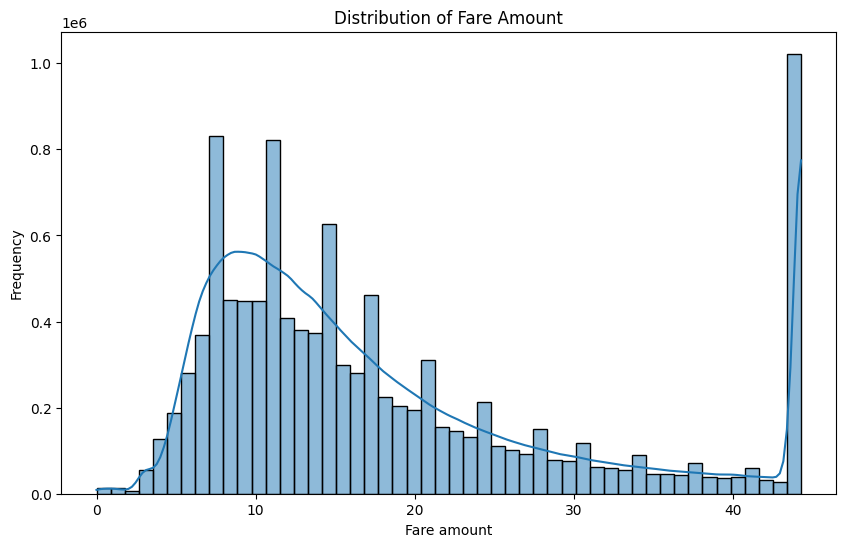

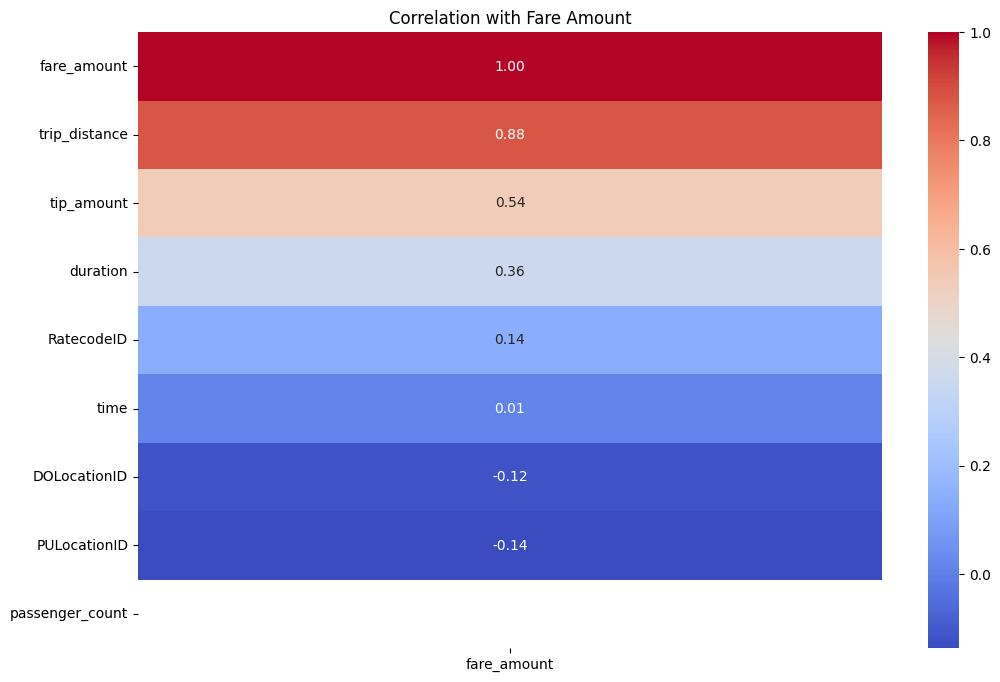

In [21]:
# Data visualization of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(taxi_data['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare amount')
plt.ylabel('Frequency')
plt.show()

# Correlation analysis with the target variable
numerical_cols = taxi_data.select_dtypes(include=np.number).columns
correlation_matrix = taxi_data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['fare_amount']].sort_values(by='fare_amount', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Fare Amount')
plt.show()

In [22]:
# Count the frequency of trips per hour of the day
trips_per_hour = map_data['time'].value_counts().sort_index()
print("Frequency of trips per hour of the day:")
display(trips_per_hour)

Frequency of trips per hour of the day:


,count
time,
0,313774
1,202482
2,127444
3,83423
4,62829
5,70578
6,151257
7,301749
8,407596


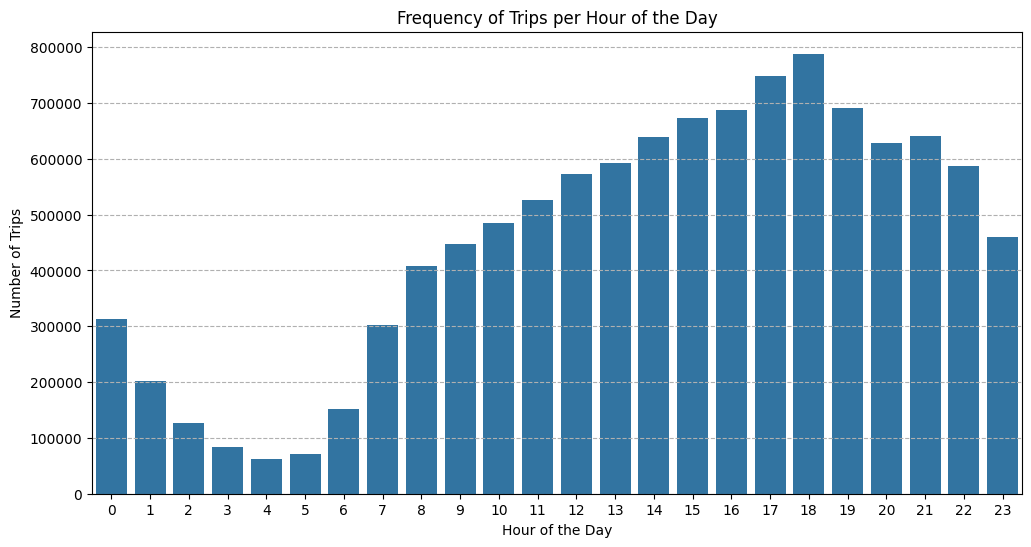

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values)
plt.title('Frequency of Trips per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()


Frequency of trips per weekday:


,count
weekday,
Friday,1645457
Monday,1331100
Saturday,1681231
Sunday,1405473
Thursday,1645758
Tuesday,1611588
Wednesday,1568090


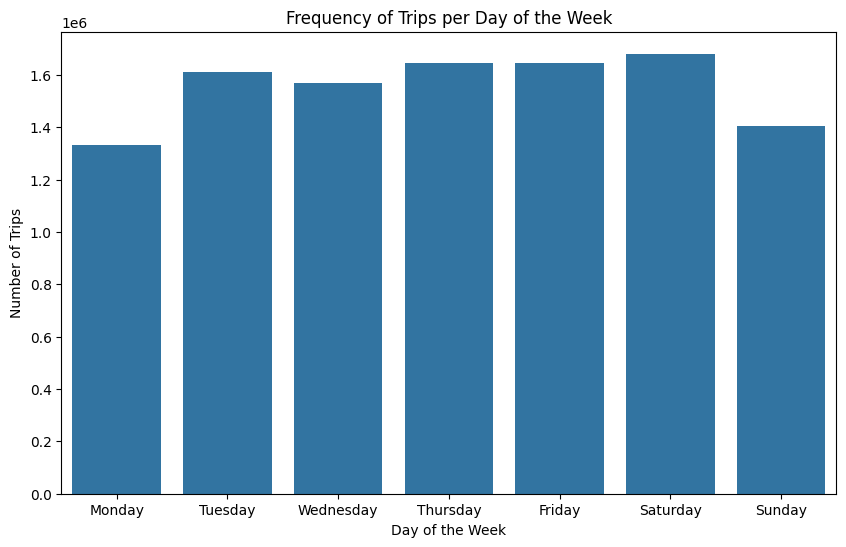

In [24]:
# Count the frequency of trips per weekday
trips_per_weekday = map_data['weekday'].value_counts().sort_index()
print("\nFrequency of trips per weekday:")
display(trips_per_weekday)

# Visualize the frequency of trips per weekday
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_per_weekday.index, y=trips_per_weekday.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Frequency of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

In [25]:
# Display the correlation between trip_distance and fare_amount
print(f"The correlation between trip_distance and fare_amount is: {correlation_matrix.loc['trip_distance', 'fare_amount']:.2f}")

The correlation between trip_distance and fare_amount is: 0.88


In [26]:
# Display the correlation between trip_distance and fare_amount
print(f"The correlation between trip_distance and tip_amount is: {correlation_matrix.loc['trip_distance', 'tip_amount']:.2f}")

The correlation between trip_distance and tip_amount is: 0.49


Text(0.5, 1.0, 'Correlation between trip_distance and tip_amount')

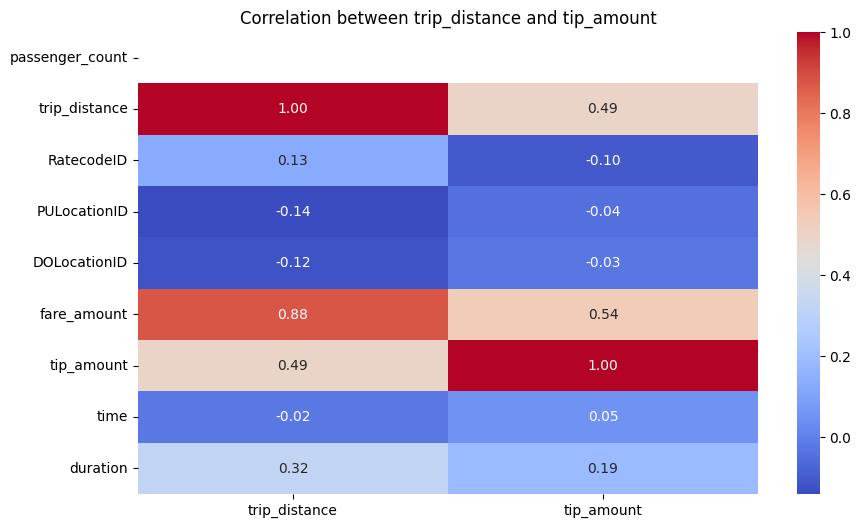

In [27]:
# tree map for correlation between trip_distance and tip_amount
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['trip_distance', 'tip_amount']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between trip_distance and tip_amount')

In [29]:
# Extract the month from the pickup datetime
map_data['pickup_month'] = taxi_data['tpep_pickup_datetime'].dt.month

# Group by month and sum the total amount
monthly_total_amount = taxi_data.groupby('pickup_month')['total_amount'].sum()

# Find the month with the maximum total amount
month_with_highest_total_amount = monthly_total_amount.idxmax()
highest_total_amount = monthly_total_amount.max()

print(f"The month with the highest total amount is month {month_with_highest_total_amount} with a total of {highest_total_amount:.2f}")

/tmp/ipython-input-697004025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data['pickup_month'] = taxi_data['tpep_pickup_datetime'].dt.month


KeyError: 'Column not found: total_amount'

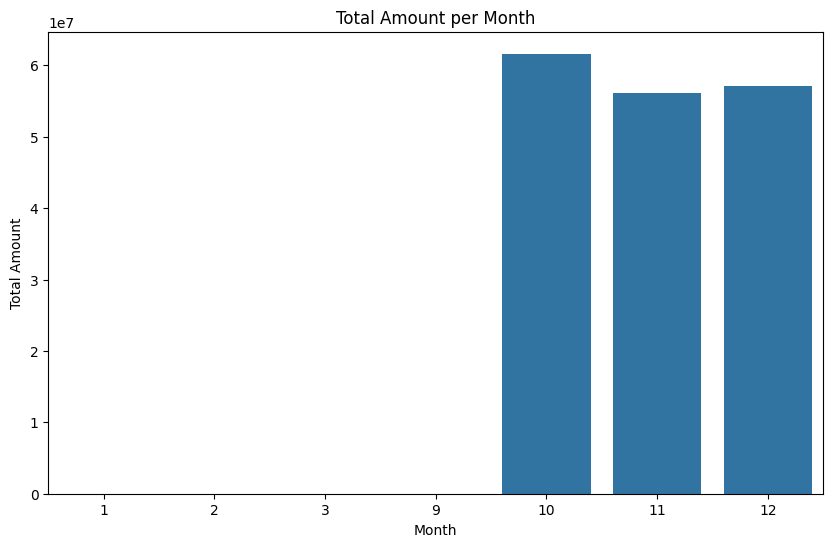

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_total_amount.index, y=monthly_total_amount.values)
plt.title('Total Amount per Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Fare Amount')

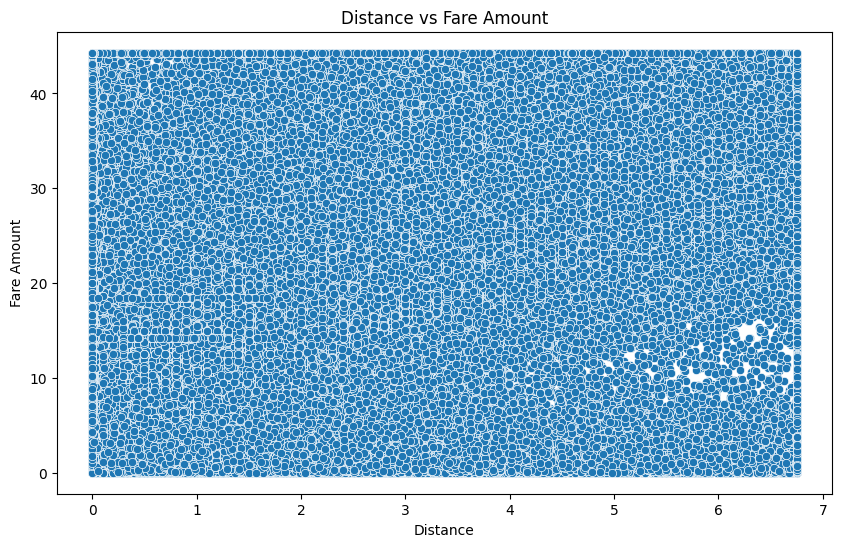

In [30]:
# scatter plot between distance and fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=map_data)
plt.title('Distance vs Fare Amount')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')

Text(0, 0.5, 'Fare Amount')

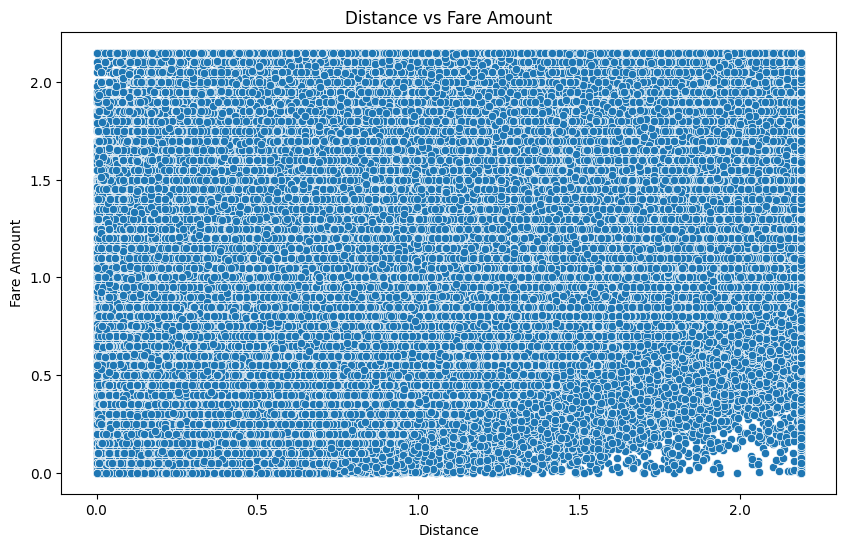

In [18]:
# scatter plot between distance and fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=taxi_data)
plt.title('Distance vs Fare Amount')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')

In [ ]:
#

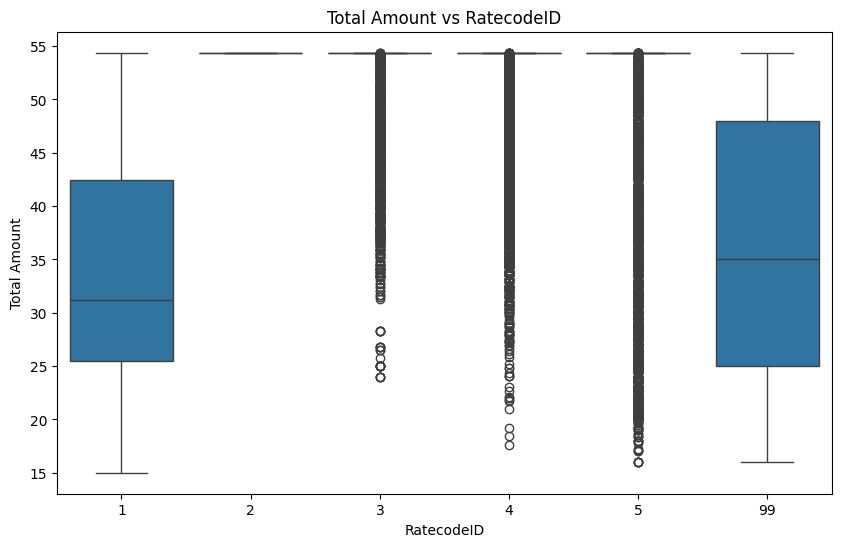

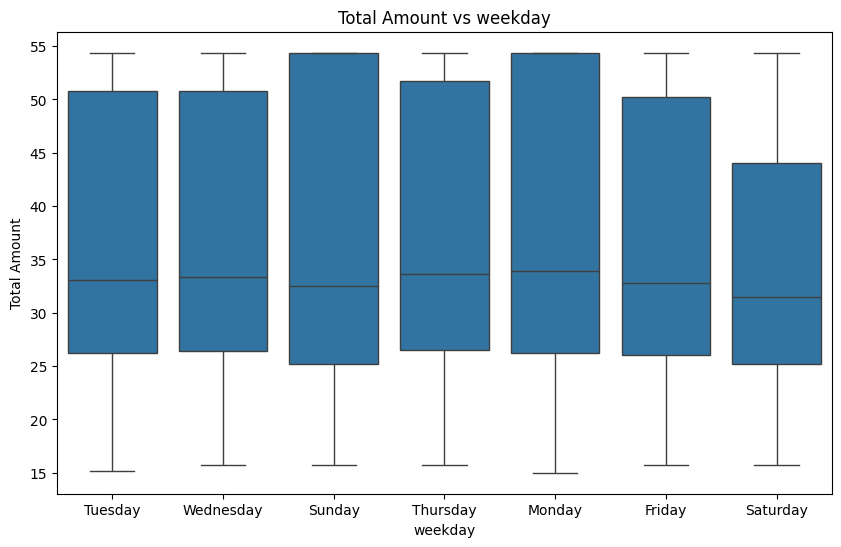

In [13]:
# # Explore relationships between categorical features and total_amount

# # Select relevant categorical columns (you might need to adjust this list based on your data)
# categorical_cols = ['RatecodeID', 'weekday'] # Add other categorical columns as needed

# for col in categorical_cols:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=col, y='total_amount', data=taxi_data)
#     plt.title(f'Total Amount vs {col}')
#     plt.xlabel(col)
#     plt.ylabel('Total Amount')
#     plt.show()